In [1]:
!pip install gradio scikit-learn pandas numpy joblib


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib


In [5]:
# Load dataset
data = pd.read_csv("diabetes.csv")

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model & scaler
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


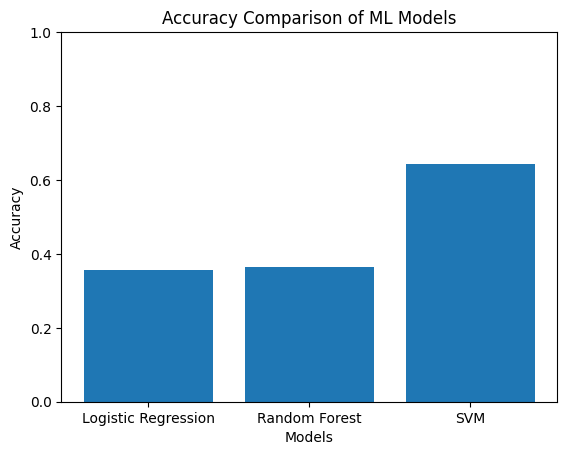

In [10]:
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred)
]

import matplotlib.pyplot as plt

plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models")
plt.ylim(0,1)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


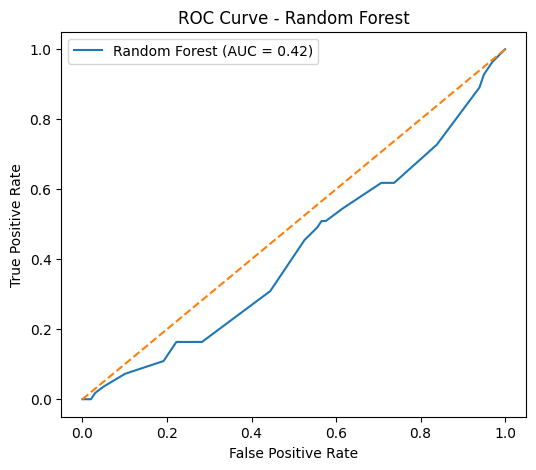

In [11]:
from sklearn.metrics import roc_curve, auc

rf_probs = rf.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


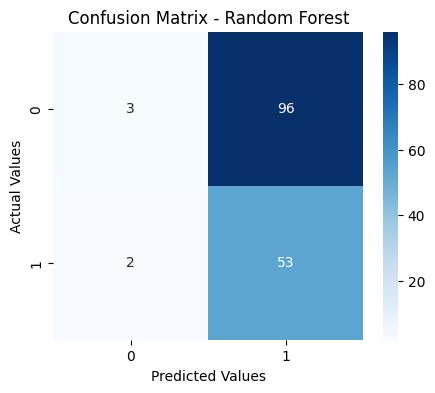

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix - Random Forest")
plt.show()


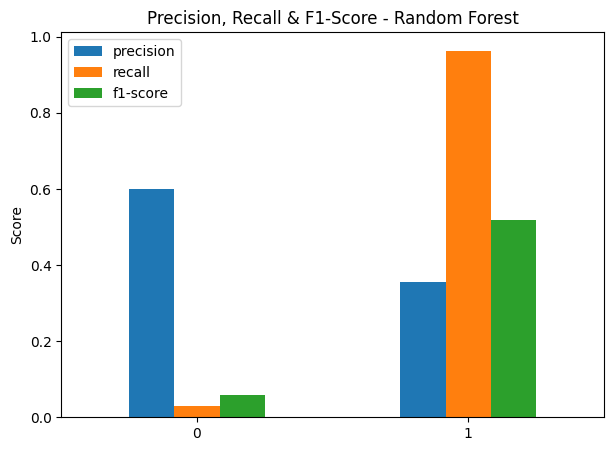

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, rf_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

df[['precision', 'recall', 'f1-score']].iloc[:2].plot(
    kind='bar',
    figsize=(7,5)
)

plt.title("Precision, Recall & F1-Score - Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
